In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
X = iris.data

Y = iris.target

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
iris_data = DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

In [7]:
iris_target = DataFrame(Y,columns=['Species'])

In [10]:
def flower(num):
  if num == 0:
    return 'Setosa'
  elif num == 1:
    return 'Versicolour'
  else:
    return 'Virginica'

In [11]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [12]:
iris_target.tail()

,Species
145,Virginica
146,Virginica
147,Virginica
148,Virginica
149,Virginica


In [13]:
iris = pd.concat([iris_data,iris_target],axis=1)

In [14]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


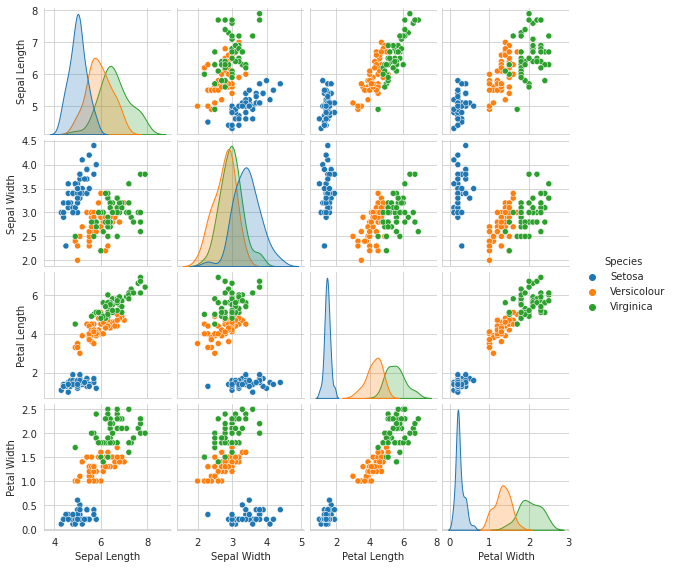

In [16]:
sns.pairplot(iris,hue='Species',height=2)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


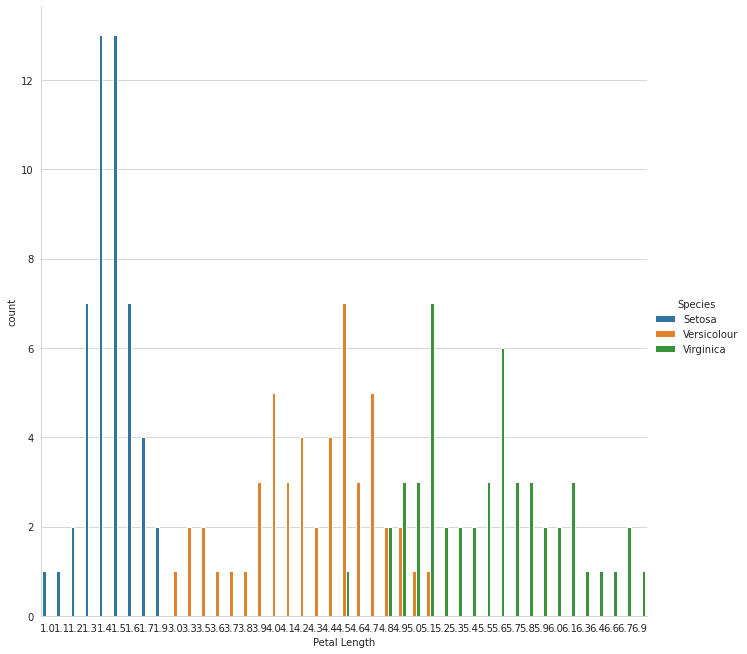

In [22]:
sns.catplot(x='Petal Length',data=iris,hue='Species',size=9,kind='count')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


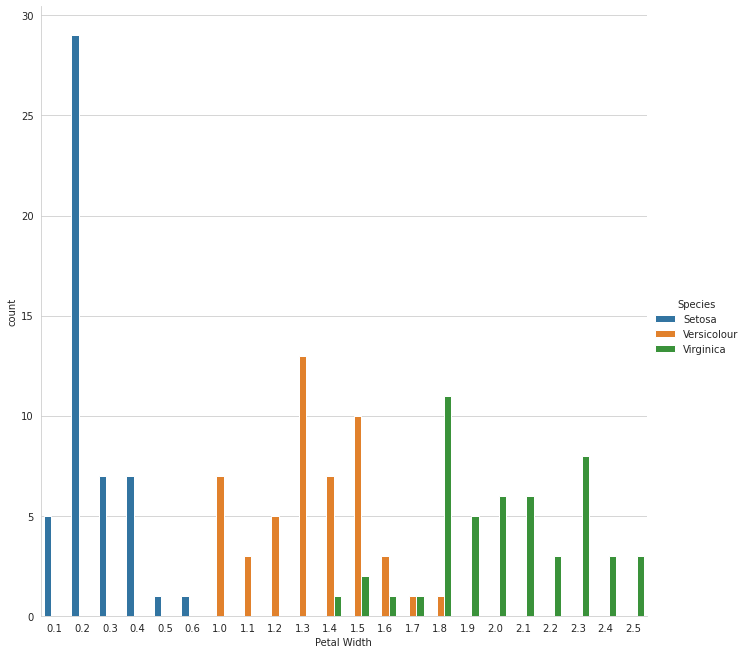

In [23]:
sns.catplot(x='Petal Width',data=iris,hue='Species',size=9,kind='count')

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [38]:
logreg = LogisticRegression()

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.35,random_state=3)

In [39]:
logreg.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
from sklearn import metrics

In [41]:
Y_pred = logreg.predict(X_test)

In [42]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.9622641509433962


In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [53]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [54]:
Y_pred = knn.predict(X_test)

In [55]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.9433962264150944


In [56]:
k_range = range(1,21)

accuracy = []

In [57]:
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,Y_train)
  Y_pred = knn.predict(X_test)

  accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

Text(0, 0.5, 'Testing Accuracy')

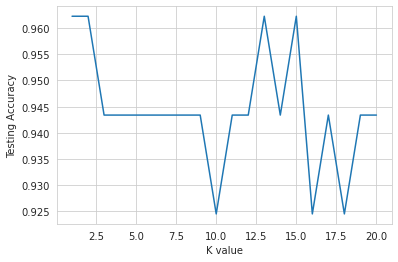

In [58]:
plt.plot(k_range,accuracy)
plt.xlabel('K value')
plt.ylabel('Testing Accuracy')